# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [3]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

class Cart():
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        new_item = input("What do you want to add?")
        quantity = int(input(f"How many {new_item}s do you want?"))
        if new_item not in self.items.keys():
            self.items[new_item] = quantity
        else: 
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}s have been added to the cart.")
    
    def remove(self):
        clear()
        discard = input("What would you like to discard?")
        quantity = int(input(f"How many {discard}s would you like to put back?"))
        try: 
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}s have been removed.")
        except:
            print(f"{discard} was not in your cart or your entry was misspelled.")
        #TODO: Create show method
        self.show()
        
    def show(self):
        print("Your cart contains the items below")
        print("  Item  |  Quantity")
        for item,quantity in self.items.items():
            print(f"{item}  | {quantity}")
            
    def checkout(self):
        clear()
        if not self.items:
            print("Really? You aren't buying anything today? Cheapskate.")
        else:
            print("Thanks for shopping!")
            self.show()
            
#Control logic and flow of our program
class Main:
    def showInstructions(self):
        print("""
        Welcome to the Shopping Program!
        Options:
        [1] Show the Current Cart.
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
    def run(self):
        name = input("What is your name?")
        my_cart = Cart()
        self.users[name] = my_cart
        
    def run(self):
        my_cart = Cart()
        
        while True:
            self.showInstructions()
            choice = input("What would you like to do?")
            if choice == "1":
                if my_cart.items:
                    my_cart.show()
                else:
                    print("Your cart is empty.")
            elif choice == "2":
                my_cart.add()
            elif choice == "3":
                if my_cart.items:
                    my_cart.remove()
                else:
                    print("There are no items to remove!")
            elif choice == "4":
                my_cart.checkout()
                break
            else:
                print("Invalid response, please try again.")
                

my_prog = Main()
my_prog.run()

Thanks for shopping!
Your cart contains the items below
  Item  |  Quantity
pie  | 9


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [564]:
# making an API call; "requests" allows us to make API calls
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/cyndaquil")
if r.status_code == 200:
    data = r.json()
else:
    print(f"Error Status Code: {r.status_code}")
    
print(data.keys())

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [565]:
# get the name
name = data["name"]
print(name)

cyndaquil


In [566]:
# get types
types = [pokemon["type"]["name"] for pokemon in data["types"]]
print(types)

['fire']


In [567]:
# get weight
weight = data["weight"]
print(weight)

79


In [568]:
# get abilities
abilities = [pokemon["ability"]["name"] for pokemon in data["abilities"]]
print(abilities)

['blaze', 'flash-fire']


In [569]:
# Create a structure for a single pokemon
first_pokemon = {
    "name": "",
    "abilities": [],
    "weight": 0
    "types": []
}

SyntaxError: invalid syntax (Temp/ipykernel_6416/2636402499.py, line 6)

In [570]:
cyndaquil = {
    "name":name,
    "abilities":abilities,
    "weight":weight,
    "types":types
}
cyndaquil

{'name': 'cyndaquil',
 'abilities': ['blaze', 'flash-fire'],
 'weight': 79,
 'types': ['fire']}

#### Create a function to Pull in your own Pokemon's data 

In [571]:
def poke_api_call(pokemon_name_or_id):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon_name_or_id}")
    if r.status_code == 200:
        data = r.json()
        
        name = data['name']
        types = [pokemon['type']['name'] for pokemon in data['types']]
        abilities = [poke['ability']['name'] for poke in data['abilities']]
        weight = data['weight']
        
        pokemon_x = {
            "name":name,
            "abilities":abilities,
            "weight":weight,
            "types":types
        }
        return pokemon_x
    else:
        print(f"Error Status Code: {r.status_code}")
        
squirtle = poke_api_call("squirtle")
bulbasaur = poke_api_call(1)
bulbasaur


{'name': 'bulbasaur',
 'abilities': ['overgrow', 'chlorophyll'],
 'weight': 69,
 'types': ['grass', 'poison']}

Choose your pokemon

In [572]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['mightyena', 'typhlosion','toxicroak','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [573]:
my_six_pokemon = {}

for member in your_team:
    poke_stats = poke_api_call(member)
    my_six_pokemon[member.title()] = poke_stats
    
my_six_pokemon

{'Mightyena': {'name': 'mightyena',
  'abilities': ['intimidate', 'quick-feet', 'moxie'],
  'weight': 370,
  'types': ['dark']},
 'Typhlosion': {'name': 'typhlosion',
  'abilities': ['blaze', 'flash-fire'],
  'weight': 795,
  'types': ['fire']},
 'Toxicroak': {'name': 'toxicroak',
  'abilities': ['anticipation', 'dry-skin', 'poison-touch'],
  'weight': 444,
  'types': ['poison', 'fighting']},
 'Blaziken': {'name': 'blaziken',
  'abilities': ['blaze', 'speed-boost'],
  'weight': 520,
  'types': ['fire', 'fighting']},
 'Marowak': {'name': 'marowak',
  'abilities': ['rock-head', 'lightning-rod', 'battle-armor'],
  'weight': 450,
  'types': ['ground']},
 'Dragonair': {'name': 'dragonair',
  'abilities': ['shed-skin', 'marvel-scale'],
  'weight': 165,
  'types': ['dragon']}}

## Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [574]:
class Pokemon(Evolver, Move_Tutor):
    def __init__(self,name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call()
        self.move_menu = []
    
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()
        
            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
        else:
            print(f"Error Status Code: {r.status_code}")
            
    #What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"
        

### Let's Catch some Pokemon

You caught a(n) raichu!


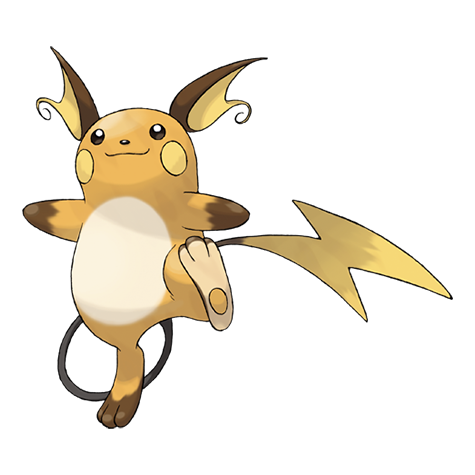

You caught a(n) raichu!
<class '__main__.Pokemon'>
{'name': 'raichu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 300, 'image': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/26.png', 'move_menu': []}


In [591]:
selected_pokemon = Pokemon("raichu")
print(selected_pokemon)
print(type(selected_pokemon))
print(selected_pokemon.__dict__)

In [576]:
pokedex = {}
for member in your_team:
    pokeball = Pokemon(member)
    pokedex[member.title()] = pokeball
    
pokedex

{'Mightyena': You caught a mightyena!,
 'Typhlosion': You caught a typhlosion!,
 'Toxicroak': You caught a toxicroak!,
 'Blaziken': You caught a blaziken!,
 'Marowak': You caught a marowak!,
 'Dragonair': You caught a dragonair!}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [577]:
# Display an image in Jupyter notebook
from IPython.display import Image
# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [578]:
class Pokemon(Evolver, Move_Tutor):
    def __init__(self,name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.image = ''
        self.poke_api_call()
        print(self)
        self.display()
        self.move_menu = []
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.image = data['sprites']['other']['official-artwork']['front_default']

        else:
            print(f"Error Status Code: {r.status_code}")
            
    def display(self):
        display(Image(self.image))
    # What happens when you print
    def __repr__(self):
        return f"You caught a(n) {self.name}!"


You caught a(n) cyndaquil!


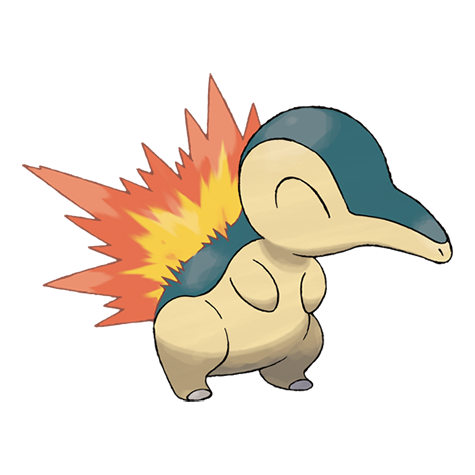

You caught a(n) cyndaquil!

In [579]:
Pokemon("cyndaquil")

In [580]:
# Calling our new method
cyndaquil.evolve()

AttributeError: 'dict' object has no attribute 'evolve'

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [581]:
#Mixins

from time import sleep

class Evolver:
    
    def evolve(self):
        #API call to pokemon-species endpoint
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code != 200:
            print(f"Species Error : {r.status_code}")
            return
        else:
            pokemon_species = r.json()
            
        r2 = requests.get(pokemon_species["evolution_chain"]["url"])
        if r2.status_code != 200:
            print(f"Evolution Chain Error : {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain["chain"]
            
        #First evolution    
        base_name = ev_chain["species"]["name"]
        
        evolution = ev_chain["evolves_to"][0]
        
        #Second evolution
        evolution_name = evolution["species"]["name"]
        
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution["evolves_to"][0]["species"]["name"]
        else:
            print(f"You can't evolve your {self.name} anymore.")
            return
        
        print("......")
        sleep(1)
        print(f"Your {self.name} is evolving?!")
        self.display()
        sleep(1)
        print(".........")
        self.name = evolution_name
        self.poke_api_call()
        self.display()


Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [582]:
class Move_Tutor:
    
    def __init__(self):
        self.move_menu = {}
        
    def teach_move(self):
        new_attack = input(f"What move do you want to teach {self.name}? ")
        self.move_menu.append(new_attack)
        print(f"{self.name} learned {new_attack}!")
    
    def show_moves(self):
        print (f"{self.name} knows the following moves: {self.move_menu}")
        return
        
    def poke_move_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/move/{self.name}/")


You caught a(n) mudkip!


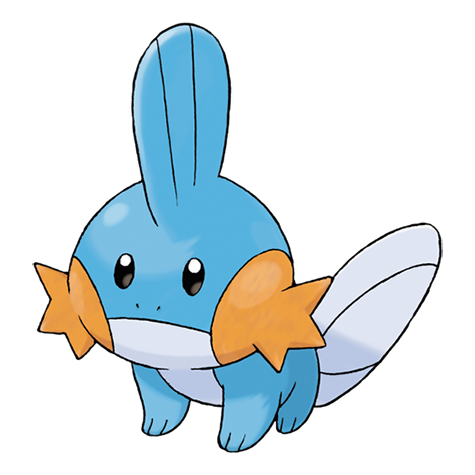

In [612]:
selected_pokemon = Pokemon("mudkip")

In [615]:
selected_pokemon.teach_move()

What move do you want to teach mudkip? tackle
mudkip learned tackle!


In [616]:
selected_pokemon.show_moves()

mudkip knows the following moves: ['splash', 'tackle']
